## Building a PT symmetric coupling matrix and seeing what effect this has on params

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [201]:
beta_0 = 0#1.305e7
coupling = 20
two_core_standard = np.array([[0-5.0j,coupling],[coupling,0+0.0j]])
vals, vecs = np.linalg.eig(two_core_standard)
print(vals, vecs)

[ 19.84313483-2.5j -19.84313483-2.5j] [[ 0.70710678+0.j          0.70710678+0.j        ]
 [ 0.70156076+0.08838835j -0.70156076+0.08838835j]]


In [202]:
def calc_supermode(length, betas, eigenvectors, beta_0, input_vec):
    propagation_constants = betas + beta_0

    # normalised_eigenvectors = eigenvectors / np.sqrt(np.einsum('i...,i...->...', np.conjugate(eigenvectors), eigenvectors))
    # normalised_eigenvectors = normalised_eigenvectors*np.exp(1.0j*propagation_constants*length)
    
    b_vec = np.einsum('i...,i...->...',  np.conjugate(eigenvectors), input_vec)
    # print(b_vec)
    psi_mat = b_vec * eigenvectors * np.exp(1.0j * propagation_constants * length)
    # print(psi_mat[:,0])
    psi = np.sum(psi_mat, axis=1)
    # print(np.argmax(psi))
    intensities = (psi*np.conjugate(psi)) /np.sum(psi*np.conjugate(psi))

    return intensities

In [203]:
def intensities_along_length(length_list, betas, eigenvectors, beta_nought, input_vec):
    vec_shape = np.shape(eigenvectors)
    length_list_length = len(length_list)
    
    propagation_constants = betas + beta_0
    b_vec = np.einsum('i...,i...->...',  np.conjugate(eigenvectors), input_vec)
    # print(b_vec)

    broad_consts = np.broadcast_to(propagation_constants, (length_list_length, vec_shape[0], vec_shape[1]))
    broad_b_vecs = np.broadcast_to(b_vec, (length_list_length, vec_shape[0], vec_shape[1]))
    broad_evecs = np.broadcast_to(eigenvectors, (length_list_length, vec_shape[0], vec_shape[1]))
    broad_len = np.array([np.ones((vec_shape[0],vec_shape[1]))*i for i in length_list])    

    psi_mat_list = broad_b_vecs * broad_evecs * np.exp(1.0j * broad_consts * broad_len)
    psi_list = np.sum(psi_mat_list, axis=2)

    intensity_list = np.transpose(psi_list*np.conj(psi_list)) / np.sum(psi_list*np.conj(psi_list), axis=1)
    return np.transpose(intensity_list)

In [204]:
# %timeit 
# for lens in np.arange(0,1000000,2):
#     i = calc_supermode(lens, vals, vecs, beta_0, [1,0])
#     # print(i)

In [205]:
long_list = np.linspace(0,1, 10000)
i_list = intensities_along_length(long_list, vals, vecs, beta_0, [1,0])
# print(i_list)

c:\Users\nr421\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


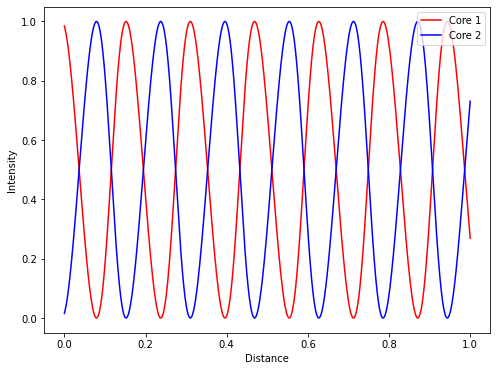

In [206]:
fig_int = plt.figure(figsize=(8,6))
ax_int = fig_int.add_subplot(111)

ax_int.plot(long_list, i_list[:,0], color='red', label='Core 1')
ax_int.plot(long_list, i_list[:,1], color='blue', label='Core 2')
ax_int.set_xlabel('Distance')
ax_int.set_ylabel('Intensity')
plt.legend(loc='upper right')
plt.show()